9


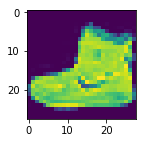

0


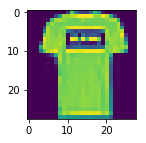

0


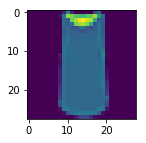

3


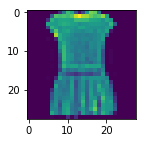

In [1]:
# 实现validation.tfrecords文件数据可视化

#导入模块
from scipy import misc
import tensorflow as tf
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from PIL import Image

#
fileNameQue = tf.train.string_input_producer(["validation.tfrecords"])

reader = tf.TFRecordReader()
key,value = reader.read(fileNameQue)

features = tf.parse_single_example(value,features={ 'label': tf.FixedLenFeature([], tf.int64),
                                           'image_raw' : tf.FixedLenFeature([], tf.string)})

image = tf.decode_raw(features["image_raw"], tf.float32)
image=tf.reshape(image,[28,28])

label = tf.cast(features['label'], tf.int32)
init = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(init)

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    # 可根据具体需求显示出一定数量的图片
    for i in range(4):
        img, lab = sess.run([image, label])
        print(lab)
        result = Image.fromarray(img) 
        # 控制显示图片大小   
        plt.figure(figsize=(3,2)) #其中figsize里的参数可以---------查询？
        # 图片显示，可以添加cmap="gray"然后图片呈灰色
        plt.imshow(img)       #  plt.imshow(img,cmap="gray")
        plt.show()
        
        img = np.array(img, dtype='uint8')
        result=Image.fromarray(img)

        # 将显示出来的照片存储在test_images文件下
        result.save('./test_images/'+str(i) +'_'+str(lab)+ '.png', 'png')

    coord.request_stop()
    coord.join(threads)